In [1]:
%matplotlib inline

from svd_faces import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

In [2]:
# 1 - svd analysis of images

# load cropped images
faces_arr, x, y = load_cropped()

# perform svd decomposition
u, s, vh = linalg.svd(faces_arr, full_matrices=False)

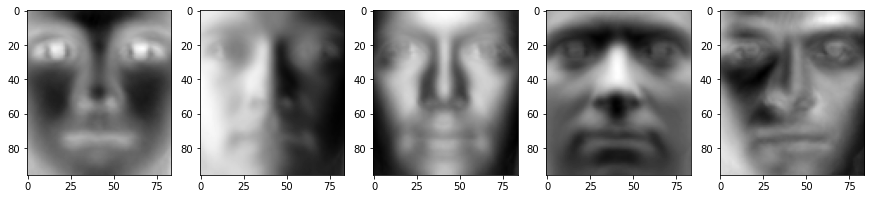

In [64]:
# 2 - interpretation
"""
U: The columns of U represent the different SVD modes present in the face dataset.
S: The values of S represent the contributions of the corresponding columns of U to variance in the face dataset.
V: V tells us how each image in the dataset projects onto each of the SVD modes. So we can use it to reconstruct 
   the images in our dataset (in conjunction with U).
"""

# plot first few reshaped columns of u
few = 5
fig, axes = plt.subplots(nrows=1, ncols=few, figsize=(15,5))
for i in range(few):
    u_col = u[:,i]
    u_im = np.reshape(u_col, (x,y))
    axes[i].imshow(u_im, cmap="gray")

The first 1 mode accounts for 11.658008575439453% of variance.
The first 10 modes account for 26.564293444156647% of variance.
The first 20 modes account for 32.36464351415634% of variance.
The first 30 modes account for 36.60696658492088% of variance.
The first 40 modes account for 40.046732664108276% of variance.
The first 50 modes account for 42.93398013710976% of variance.
The first 60 modes account for 45.42266771197319% of variance.
The first 70 modes account for 47.63717196881771% of variance.
The first 80 modes account for 49.62548327445984% of variance.
The first 90 modes account for 51.438259959220886% of variance.
The first 100 modes account for 53.100560918450356% of variance.


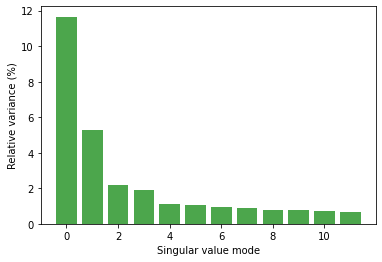

In [65]:
# 3 - SVD spectrum
"""
The answer to how many modes are necessary for a good reconstruction depends on how we define "good." If good means
25% reconstruction, then the first 8 modes are necessary. If good means 50%, we need 82. We will see how good these
actually look in the next section.
"""

# plot singular value spectrum
s = s * 100 / sum(s)
bins = 12
fig, ax = plt.subplots()
ax.bar(range(bins), s[:bins], color="g", alpha=0.7)
ax.set_xlabel("Singular value mode")
ax.set_ylabel("Relative variance (%)")

# interpret sv spectrum
modes = 101
print(f"The first 1 mode accounts for {s[0]}% of variance.")
for i in np.arange(10, modes, 10):
    print(f"The first {i} modes account for {sum(s[:i])}% of variance.")

In [62]:
print(u.shape)
print(s.shape)
print(vh.shape)

print(reco.shape)

print()

(8064, 2414)
(2414,)
(2414, 2414)
(96, 84)


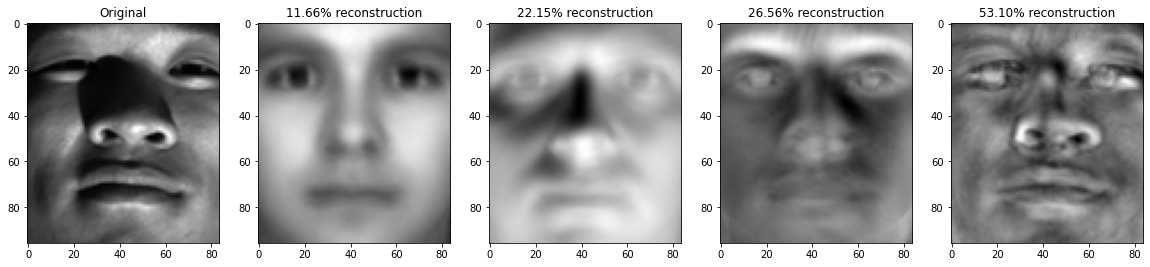

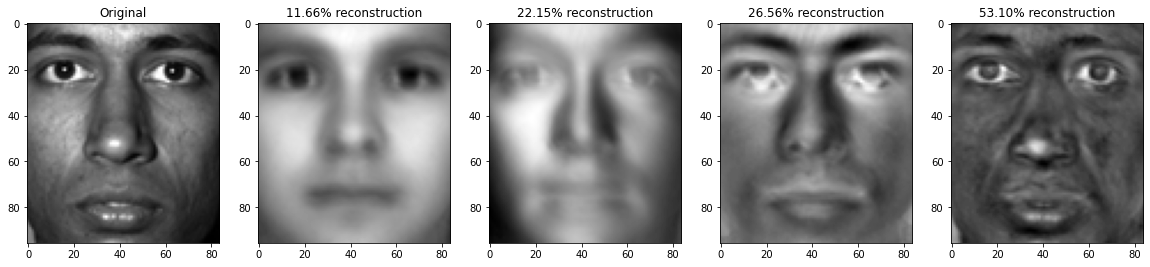

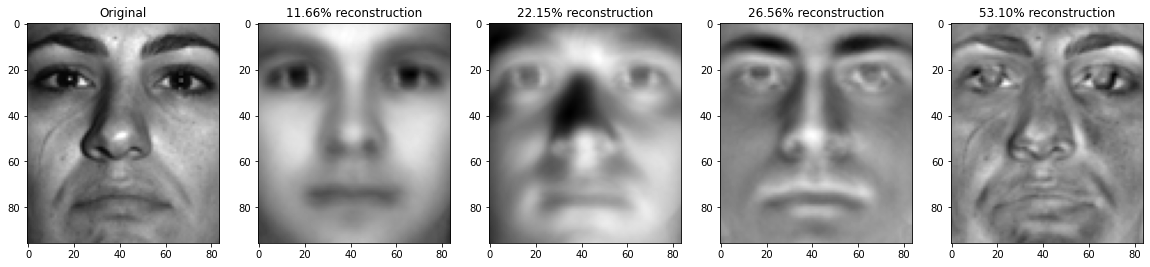

In [103]:
# 3 - reconstructions
"""

"""

img_idxs = [24, 200, 503]
for img_idx in img_idxs:
    modes_arr = [1, 5, 10, 100]   # n modes to use in reconstruction

    # reconstruct
    recos = []
    for modes in modes_arr:
        reco = np.zeros((x,y))
        for i in range(modes):
            mode = np.reshape(u[:,i], (x,y))
            cntr = vh[i, img_idx]

            reco += cntr * mode
        recos.append(reco)

    # visualize
    fig, axes = plt.subplots(nrows=1, ncols=1 + len(recos), figsize=(20,5))
    axes[0].imshow(np.reshape(faces_arr[:,img_idx], (x,y)), cmap="gray")
    axes[0].set_title("Original")
    for i in range(len(recos)):
        reco = recos[i]
        axes[i+1].imshow(reco, cmap="gray")
        axes[i+1].set_title("{:.2f}% reconstruction".format(sum(s[:modes_arr[i]])))


In [94]:
recos[3]

array([[ 0.00442534,  0.00381629, -0.00309964, ..., -0.00150183,
        -0.00724229, -0.00954467],
       [ 0.00274795, -0.00058675, -0.00498983, ..., -0.00749692,
        -0.00509391, -0.00561789],
       [ 0.00148284, -0.00144904, -0.00371839, ..., -0.00358504,
        -0.00268018, -0.00314318],
       ...,
       [-0.00348391, -0.00672194, -0.00673955, ...,  0.00355337,
         0.01050771,  0.0157421 ],
       [ 0.00446305, -0.00892259, -0.00383357, ...,  0.00541578,
         0.01081659,  0.0125626 ],
       [ 0.0181811 ,  0.00547911,  0.00019799, ...,  0.00101794,
         0.0019491 ,  0.00103069]])